## Homework 5: Neural Network - AI 240 Programming for Machine Learning

### Instructor - Dr. Uma Gajendragadkar

### Problem -  Design and develop a Machine learning model for ANN based customer Churn Prediction using simple neural network.

In [37]:
# Import libraries
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import tensorflow.keras as tf
import seaborn as sns

In [38]:
# Read dataset
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [39]:
# Display first 10 rows of the dataset
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [40]:
# Display the last 10 rows of the dataset
churn_df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [41]:
# Display the value counts in the Churn column of the dataset
churn_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [42]:
# Display the value counts in the Contract column
churn_df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [43]:
# Display the value counts in the OnlineSecurity column
churn_df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [44]:
# Display the value counts in the MultipleLines columns
churn_df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [45]:
# Display the dataset's info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
# Convert TotalCharges column value from string to float
import numpy as np

churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(" ", np.nan)

churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float).fillna(0)

In [47]:
# Locate "No internet service" in columns
cols_no_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
                    'StreamingTV', 'StreamingMovies']

# Replace "No internet service" with "No"
churn_df[cols_no_internet] = churn_df[cols_no_internet].replace("No internet service", "No")

In [48]:
# Replace "No phone service" with "No' in the MultipleLines column
churn_df['MultipleLines'] = churn_df['MultipleLines'].replace("No phone service", "No")

In [49]:
# Replace "Fiber optic", "DSL" in InternetService column with "Yes"
churn_df['InternetService'] = churn_df['InternetService'].replace(["Fiber optic", "DSL"], "Yes")

In [50]:
# Manually map the Contract column to reflect actual ordinal relationship
churn_df['Contract'] = churn_df['Contract'].map({
                        "Month-to-month": 0,
                             "One year" : 1,
                             "Two year" : 2
})

In [51]:
# Change values in PaymentMethod column to either "check" or "automatic"
churn_df['AutomaticPayment'] = churn_df['PaymentMethod'].replace({
                            "Electronic check" : "Check",
                             "Mailed check"    : "Check",
                            "Bank transfer (automatic)" : "Automatic",
                            "Credit card (automatic)"   : "Automatic"
})

In [52]:
# Manually map the new AutomaticPayment column
churn_df['AutomaticPayment'] = churn_df['AutomaticPayment'].map({ "Check" : 0, "Automatic" : 1})

In [53]:
# Drop unnecessary column
churn_df = churn_df.drop(["customerID", "gender", "PaymentMethod"], axis=1)

In [54]:
# Group all yes/no columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', \
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',  
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [55]:
# Loop through each yes_no_column with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in yes_no_cols:
    churn_df[col] = le.fit_transform(churn_df[col])

In [56]:
# Display dataset
churn_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AutomaticPayment
0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0
3,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,1
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0


In [57]:
# Describe dataset
churn_df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AutomaticPayment
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,2279.734304,0.265370,0.435326
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,2266.794470,0.441561,0.495835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,1.000000,1.000000


In [58]:
# Display datatypes
churn_df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
AutomaticPayment      int64
dtype: object

In [59]:
# Create target column
y = churn_df['Churn']
x = churn_df.drop(['Churn'],axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [61]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ..., -1.16032292,
        -0.99261052, -0.87802783],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.25962894,
        -0.17216471, -0.87802783],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.36266036,
        -0.9580659 , -0.87802783],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ..., -1.1686319 ,
        -0.85293201, -0.87802783],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.32033821,
        -0.87051315, -0.87802783],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.35896134,
         2.01389665,  1.13891607]])

In [62]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-1.281257e-16,8.121353e-17,-2.534770e-17,5.561361e-17,3.379694e-17,8.222240e-17,-3.278807e-18,3.934569e-17,-7.566478e-17,-5.952296e-17,-6.406285e-17,-3.783239e-17,4.993876e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-8.541762e-01,-1.901403e+00,-6.339330e-01,-7.255627e-01,-7.239675e-01,-6.394386e-01,-7.901317e-01,-7.960701e-01,-8.282069e-01,-1.205113e+00,-1.545860e+00,-1.005780e+00,-8.780278e-01
25%,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-8.541762e-01,5.259274e-01,-6.339330e-01,-7.255627e-01,-7.239675e-01,-6.394386e-01,-7.901317e-01,-7.960701e-01,-8.282069e-01,-1.205113e+00,-9.725399e-01,-8.299464e-01,-8.780278e-01
50%,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,-8.541762e-01,5.259274e-01,-6.339330e-01,-7.255627e-01,-7.239675e-01,-6.394386e-01,-7.901317e-01,-7.960701e-01,-8.282069e-01,8.297975e-01,1.857327e-01,-3.905282e-01,-8.780278e-01
75%,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,1.170719e+00,5.259274e-01,1.577454e+00,1.378241e+00,1.381277e+00,1.563872e+00,1.265612e+00,1.256171e+00,3.712710e-01,8.297975e-01,8.338335e-01,6.648034e-01,1.138916e+00
max,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,1.170719e+00,5.259274e-01,1.577454e+00,1.378241e+00,1.381277e+00,1.563872e+00,1.265612e+00,1.256171e+00,1.570749e+00,8.297975e-01,1.794352e+00,2.825806e+00,1.138916e+00


### Split Data into train and test

In [63]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=7)

In [65]:
ytrain.value_counts()

Churn
0    4153
1    1481
Name: count, dtype: int64

In [66]:
x.shape

(7043, 18)

In [67]:
model = tf.models.Sequential()

### Add the layers

In [68]:
model.add(tf.layers.Dense(16,input_dim=18,activation='relu'))
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(1,activation="sigmoid"))

C:\Users\derrick.harden\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [69]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(xtrain,ytrain,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6727 - loss: 0.5760 - val_accuracy: 0.7640 - val_loss: 0.4724
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.4628 - val_accuracy: 0.8012 - val_loss: 0.4343
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.4400 - val_accuracy: 0.8057 - val_loss: 0.4250
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4315 - val_accuracy: 0.8012 - val_loss: 0.4217
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4260 - val_accuracy: 0.8004 - val_loss: 0.4195
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.4220 - val_accuracy: 0.7959 - val_loss: 0.4196
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4196 - val_accuracy: 0.7968 - val_loss: 0.4177
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.4173 - val_accuracy: 0.8004 - v

In [70]:
ypred = model.predict(xtest)
ypred = ypred.argmax(axis=-1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7246273953158269

<Axes: >

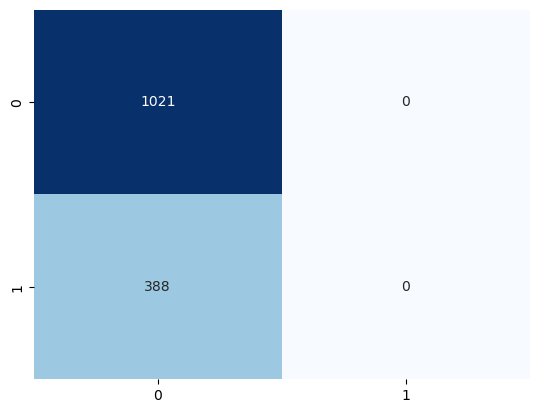

In [72]:
# Confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)